In [81]:
import os
path = r'D:\desktop\碩士論文\coating data'
os.chdir(path)
print(os.listdir())
file = os.listdir()[4]
print(file)

['20160319 SiO2-2.TXT', '20160319 SiO2.TXT', '20160320 TiO2 -2 single layer.TXT', 'AR coating.xlsx', 'Cr_AR.TXT', 'Cr_HR.TXT', 'OT.xlsx', '鍍膜設計.xlsx']
Cr_AR.TXT


In [82]:
import pandas as pd
import numpy as np
import re

W = []
T = []
with open(file, 'r') as raw:
    line = raw.read().find('Data Points')
    raw.seek(0)
    txt = raw.read()[line:]
    data = re.split(r'\n|\t', txt)[3:-2]
    for i,v  in enumerate(data):
        if i%2 == 0:
            W.append(np.float64(v))
        else:
            T.append(np.float64(v))

In [99]:
B270 = r'D:\desktop\LAB report\材料\B270推算之空白檔.xls'
B270 = pd.read_excel(B270, 'Air-glass 換算')
B270 = B270.loc[3:, ['Unnamed: 0', 'Unnamed: 1']]
B270.columns = ['W', 'T0']
Tg = []
for i in B270['T0']:
    l = i/100
    Tg.append(2*l/(1+l))
Tg = np.array(Tg)
Tf = np.array(T)/100
Tn = Tf/(1-Tf*((1/Tg)-1))

In [134]:
def n(w):
    n0 = np.sqrt(2.282*(w**2)/((w**2)-0.01185)+3.27644*(w**2)/((w**2)-282.734)+1)
    return n0

n_YAG = []
for i in W:
    n_YAG.append(n(i/1000))
T_YAG = 1- (np.array(n_YAG) -1)/(np.array(n_YAG)+1)

T_f = 1/((1/T_YAG)+(1/Tn)-1)

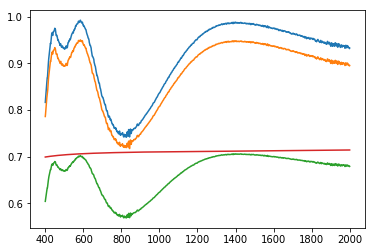

In [135]:
import matplotlib.pyplot as plt
plt.plot(W, Tn)
plt.plot(W, Tf)
plt.plot(W, T_f)
plt.plot(W, T_YAG)
plt.show()